In [24]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
from shapely.geometry import Point

In [25]:
poi_df = pd.read_csv('../exports/POI.csv')
df = pd.read_csv('../exports/Income.csv')
df.head()


,Location,Avg_Yearly_Income_Above_2012
0,Riverdale,63444.125
1,Williamsbridge,57027.125
2,Throgs Neck,61644.875
3,Pelham Parkway,54912.375
4,Morrisania,25512.625


In [26]:
districts_gdf = gpd.read_file('../geo/Community Districts.geojson')

In [27]:
# Convert POI to GeoDataFrame
poi_gdf = gpd.GeoDataFrame(
    poi_df,
    geometry=gpd.points_from_xy(poi_df['longitude'], poi_df['latitude']),
    crs=districts_gdf.crs  # Ensure both datasets use the same coordinate reference system (CRS)
)


In [28]:
# Perform spatial join
merged_gdf = gpd.sjoin(poi_gdf, districts_gdf, how='left', predicate='within')

# Inspect the result
merged_gdf.head()


,BOROUGH,longitude,latitude,Residential,Education Facility,Cultural Facility,Recreational Facility,Social Services,Transportation Facility,Commercial,...,Religious Institution,Health Services,Public Safety,Water,Miscellaneous,geometry,index_right,boro_cd,shape_area,shape_leng
0,Manhattan,-74.007017,40.724635,0,0,0,0,0,1,0,...,0,0,0,0,0,POINT (-74.00702 40.72463),52.0,102,37724014.4661,35009.7164863
1,Queens,-73.826616,40.797183,0,0,0,0,0,1,0,...,0,0,0,0,0,POINT (-73.82662 40.79718),51.0,407,328287975.076,145357.125791
2,Brooklyn,-73.993954,40.703847,0,0,0,0,0,1,0,...,0,0,0,0,0,POINT (-73.99395 40.70385),10.0,302,79338252.8335,74158.8760718
3,Manhattan,-73.991941,40.709600,0,0,0,0,0,1,0,...,0,0,0,0,0,POINT (-73.99194 40.7096),53.0,103,46879867.1584,30508.6397506
4,Brooklyn,-73.952661,40.739066,0,0,0,0,0,1,0,...,0,0,0,0,0,POINT (-73.95266 40.73907),NaN,NaN,NaN,NaN


In [29]:
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 20361 entries, 0 to 20360
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   BOROUGH                  20361 non-null  object  
 1   longitude                20361 non-null  float64 
 2   latitude                 20361 non-null  float64 
 3   Residential              20361 non-null  int64   
 4   Education Facility       20361 non-null  int64   
 5   Cultural Facility        20361 non-null  int64   
 6   Recreational Facility    20361 non-null  int64   
 7   Social Services          20361 non-null  int64   
 8   Transportation Facility  20361 non-null  int64   
 9   Commercial               20361 non-null  int64   
 10  Government Facility      20361 non-null  int64   
 11  Religious Institution    20361 non-null  int64   
 12  Health Services          20361 non-null  int64   
 13  Public Safety            20361 non-null  int64   
 14  Wat

In [30]:

merged_gdf = merged_gdf.dropna().copy()

In [31]:
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19690 entries, 0 to 20360
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   BOROUGH                  19690 non-null  object  
 1   longitude                19690 non-null  float64 
 2   latitude                 19690 non-null  float64 
 3   Residential              19690 non-null  int64   
 4   Education Facility       19690 non-null  int64   
 5   Cultural Facility        19690 non-null  int64   
 6   Recreational Facility    19690 non-null  int64   
 7   Social Services          19690 non-null  int64   
 8   Transportation Facility  19690 non-null  int64   
 9   Commercial               19690 non-null  int64   
 10  Government Facility      19690 non-null  int64   
 11  Religious Institution    19690 non-null  int64   
 12  Health Services          19690 non-null  int64   
 13  Public Safety            19690 non-null  int64   
 14  Wat

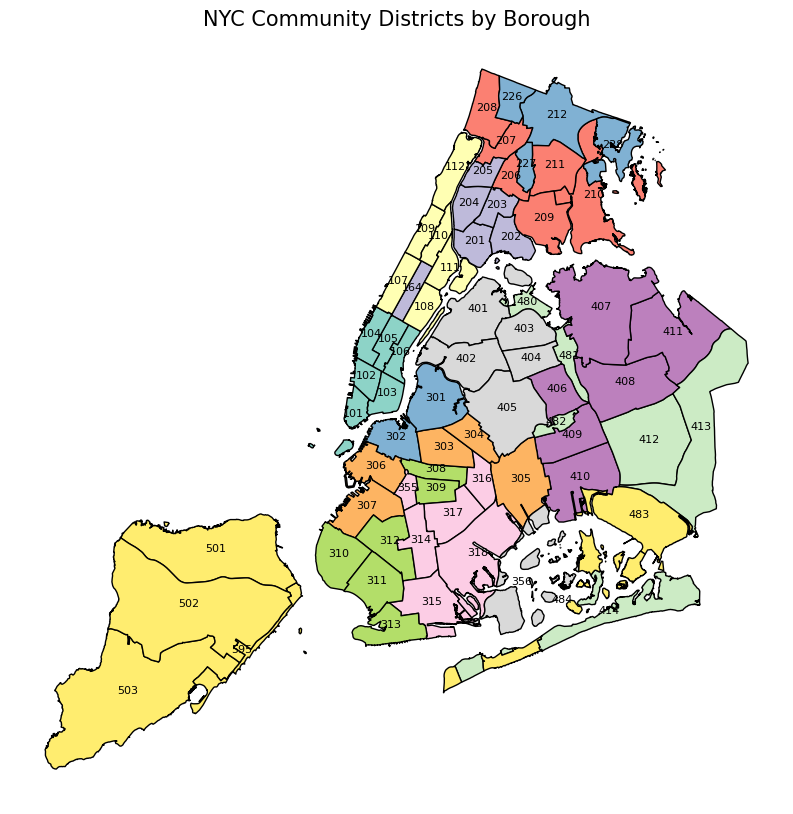

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
districts_gdf.plot(ax=ax, column='boro_cd', legend=False, cmap='Set3', edgecolor='black')

# Add labels for each community district
for idx, row in districts_gdf.iterrows():
    # Use the centroid of the polygon to place the label
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y,
             row['boro_cd'], fontsize=8, ha='center', color='black')

# Add title and remove axes
ax.set_title('NYC Community Districts by Borough', fontsize=15)
ax.axis('off')

plt.show()